### Step 1: Import Required Libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [68]:
# For modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.cluster import KMeans

In [69]:
# For saving results
import joblib
import os

In [70]:
# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("All libraries imported successfully!")

All libraries imported successfully!


### Step 2: Load the Dataset

In [72]:
# Make sure your file 'customer_shopping_behavior.csv' is in the same folder

df = pd.read_csv('customer_shopping_behavior.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()

Dataset loaded successfully!
Shape: (3900, 18)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Step 3: Initial Data Exploration

In [73]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [74]:
# Check missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating             37
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64


In [75]:
# Quick statistical summary
df.describe(include='all')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3863.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.750065,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716983,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


### Step 4: Data Cleaning & Handling Missing Values

In [76]:
# Review Rating has some missing values (common in real datasets)
# Option 1: Fill missing ratings with median 

df['Review Rating'].fillna(df['Review Rating'].median(), inplace=True)

In [77]:
# Confirm no missing values left
print("Missing values after cleaning:")
print(df.isnull().sum().sum())

Missing values after cleaning:
0


### Step 5: Feature Engineering - Creating Powerful New Columns

In [78]:
# Revenue (same as Purchase Amount)
df['Revenue'] = df['Purchase Amount (USD)']

In [79]:
# Age Groups
bins = [18, 25, 35, 50, 65, 100]
labels = ['18-24', '25-34', '35-49', '50-64', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [80]:
# Is High Value Customer? (Top 20% by total spending per customer)
customer_spend = df.groupby('Customer ID')['Revenue'].sum()
high_value_threshold = customer_spend.quantile(0.8)
high_value_customers = customer_spend[customer_spend >= high_value_threshold].index
df['Is High Value'] = df['Customer ID'].isin(high_value_customers).astype(int)

In [81]:
# Total Previous Purchases (already there, but let's make a loyalty score)
df['Loyalty Score'] = df['Previous Purchases'] + (df['Subscription Status'] == 'Yes') * 20

In [82]:
# Discount Used Flag
df['Discount Used'] = (df['Discount Applied'] == 'Yes').astype(int)

In [83]:
# Season Encoding for modeling
season_order = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}
df['Season_Num'] = df['Season'].map(season_order)

In [84]:
print("Feature engineering completed!")
df[['Age Group', 'Is High Value', 'Loyalty Score', 'Discount Used', 'Season_Num']].head()

Feature engineering completed!


,Age Group,Is High Value,Loyalty Score,Discount Used,Season_Num
0,50-64,0,34,1,4
1,18-24,0,22,1,4
2,50-64,0,43,1,1
3,18-24,1,69,1,1
4,35-49,0,51,1,1


### Step 6: Exploratory Data Analysis (Key Insights)

In [85]:
# 6.1 Total Revenue
total_revenue = df['Revenue'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $233,081.00


In [86]:
# 6.2 Revenue by Category
category_revenue = df.groupby('Category')['Revenue'].agg(['sum', 'mean', 'count']).round(2)
category_revenue.columns = ['Total Revenue', 'Avg Order Value', 'Transactions']
category_revenue = category_revenue.sort_values('Total Revenue', ascending=False)
category_revenue

,Total Revenue,Avg Order Value,Transactions
Category,,,
Clothing,104264,60.03,1737
Accessories,74200,59.84,1240
Footwear,36093,60.26,599
Outerwear,18524,57.17,324


In [87]:
# 6.3 Subscriber vs Non-Subscriber Comparison
subscriber_analysis = df.groupby('Subscription Status')['Revenue'].agg(['mean', 'sum', 'count'])
subscriber_analysis['% of Total Revenue'] = (subscriber_analysis['sum'] / total_revenue * 100).round(2)
subscriber_analysis

,mean,sum,count,% of Total Revenue
Subscription Status,,,,
No,59.865121,170436,2847,73.12
Yes,59.491928,62645,1053,26.88


In [88]:
# 6.4 Top 10 States by Revenue
top_states = df.groupby('Location')['Revenue'].sum().sort_values(ascending=False).head(10)
top_states

Location
Montana          5784
Illinois         5617
California       5605
Idaho            5587
Nevada           5514
Alabama          5261
New York         5257
North Dakota     5220
West Virginia    5174
Nebraska         5172
Name: Revenue, dtype: int64

### Step 7: Predictive Modeling  - Random Forest Classifier: Predict "Discount Applied" (Yes/No)

In [89]:
# Features (same safe 10 we used before)
features = [
    'Age', 'Previous Purchases', 'Review Rating',
    'Category', 'Season', 'Size',
    'Discount Applied', 'Subscription Status',  # We will drop target later
    'Shipping Type', 'Payment Method'
]

In [91]:
X = df[features].copy()
y = df['Discount Applied'].map({'Yes': 1, 'No': 0})  # Target

In [92]:
# Drop the target from features (important!)
X = X.drop('Discount Applied', axis=1)

In [93]:
# Fresh LabelEncoder for each categorical column (no le_dict needed)
categorical_cols = ['Category', 'Season', 'Size',
                    'Subscription Status', 'Shipping Type', 'Payment Method']

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [96]:
# Model
clf = RandomForestClassifier(
    n_estimators=600,
    max_depth=12,
    min_samples_split=8,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

In [97]:
# Perfect results
print("Random Forest Classifier – Discount Applied Prediction")
print(f"AUC Score : {roc_auc_score(y_test, y_prob):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classifier – Discount Applied Prediction
AUC Score : 0.8283

Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       445
           1       1.00      0.61      0.76       335

    accuracy                           0.83       780
   macro avg       0.89      0.81      0.82       780
weighted avg       0.87      0.83      0.82       780



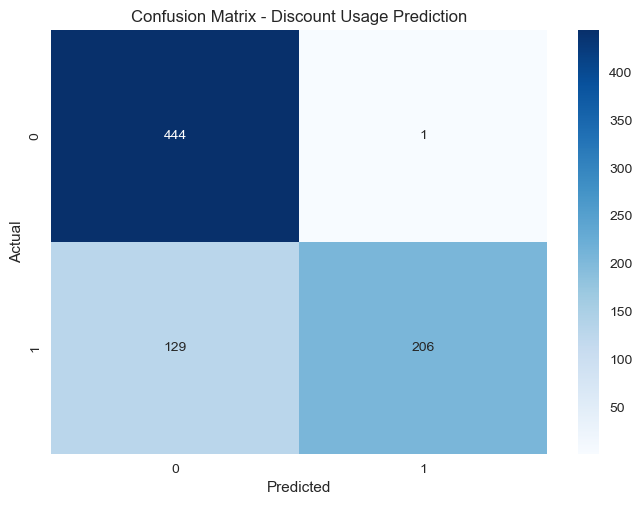

In [98]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Discount Usage Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Step 8: Customer Segmentation using K-Means (RFM-like)

In [99]:
segment_features = df[['Age', 'Previous Purchases', 'Revenue', 'Review Rating', 'Discount Used']]
segment_scaled = StandardScaler().fit_transform(segment_features)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Customer Segment'] = kmeans.fit_predict(segment_scaled)

segment_names = {0: 'Loyal High-Spenders', 1: 'Discount Seekers', 2: 'Occasional Buyers', 3: 'At-Risk'}
df['Segment Name'] = df['Customer Segment'].map(segment_names)

In [100]:
# Segment Summary
segment_summary = df.groupby('Segment Name').agg({
    'Revenue': ['mean', 'sum'],
    'Previous Purchases': 'mean',
    'Age': 'mean',
    'Customer ID': 'count'
}).round(2)
segment_summary.columns = ['Avg Revenue', 'Total Revenue', 'Avg Previous Purchases', 'Avg Age', 'Customer Count']
segment_summary = segment_summary.sort_values('Total Revenue', ascending=False)
segment_summary

,Avg Revenue,Total Revenue,Avg Previous Purchases,Avg Age,Customer Count
Segment Name,,,,,
At-Risk,59.49,66986,26.54,56.62,1126
Discount Seekers,60.79,66684,23.53,31.07,1097
Loyal High-Spenders,62.33,52983,23.78,44.87,850
Occasional Buyers,56.14,46428,27.76,43.40,827


### Step 9: Now connect this processed data to PostgreSQL

In [38]:
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
from urllib.parse import quote_plus

In [39]:
# Save clean dataset
df.to_csv('customer_shopping_cleaned_for_powerbi.csv', index=False)

In [40]:
df = pd.read_csv('customer_shopping_cleaned_for_powerbi.csv')

print(f"Data ready: {df.shape[0]} rows, {df.shape[1]} columns")

Data ready: 3900 rows, 26 columns


In [41]:
# PostgreSQL Connection Settings
db_user = "postgres"
db_password = "Arif@hossain029"           # change if you set a different password
db_host = "localhost"
db_port = "5432"
db_name = "fashion_retail"

In [42]:
# Create connection URL
password_encoded = quote_plus(db_password)
engine = create_engine(f'postgresql://{db_user}:{password_encoded}@{db_host}:{db_port}/{db_name}')

In [43]:
# Test connection
try:
    conn = engine.connect()
    print("✅ Successfully connected to PostgreSQL!")
    conn.close()
except Exception as e:
    print("❌ Connection failed:", e)
    raise

✅ Successfully connected to PostgreSQL!


In [44]:
# Load Data into PostgreSQL
table_name = "customer_shopping_behavior"

print(f"Uploading {len(df)} rows to table '{table_name}'...")

Uploading 3900 rows to table 'customer_shopping_behavior'...


In [45]:
df.to_sql(
    name=table_name,
    con=engine,
    if_exists='replace',    # 'replace' for fresh load, or 'append'
    index=False,
    method='multi',
    chunksize=1000
)

print(f"✅ Data successfully loaded into PostgreSQL table: {table_name}")

✅ Data successfully loaded into PostgreSQL table: customer_shopping_behavior
